# HOUSE PRICE PREDICTION USING ADVANCED REGRESSION

In [126]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
#loading the dataset
df=pd.read_csv('C:/Users/User/OneDrive/Desktop/VERZEO/train.csv')

### Understanding the dataset

In [128]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [129]:
df.shape

(1460, 81)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [131]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [132]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Analyzing the target variable : Saleprice

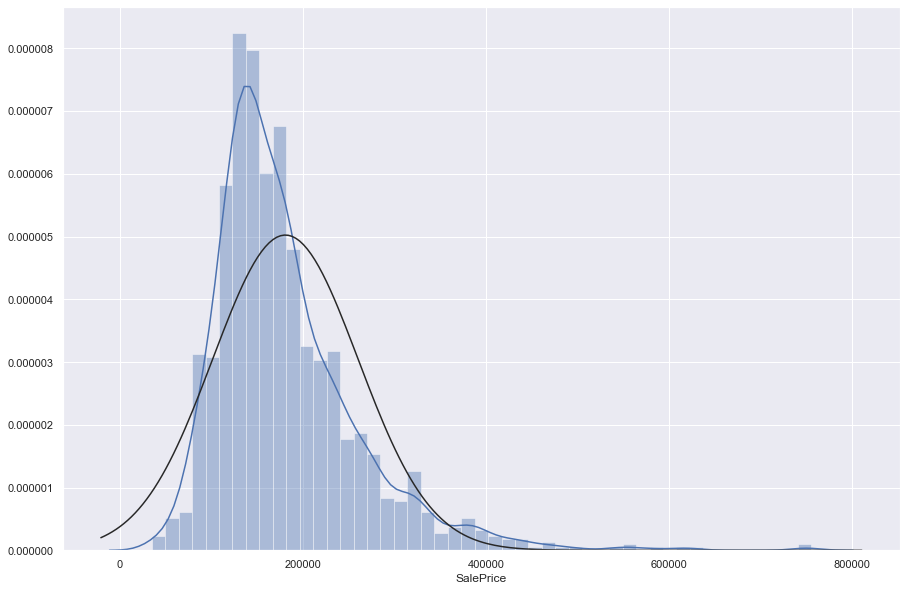

In [133]:
from scipy import stats
plt.subplots(figsize=(15,10))
sns.distplot(df['SalePrice'],fit=stats.norm)

In [134]:
(mu , sigma) = stats.norm.fit(df['SalePrice'])
#to get the parameters 

Text(0, 0.5, 'Frequency')

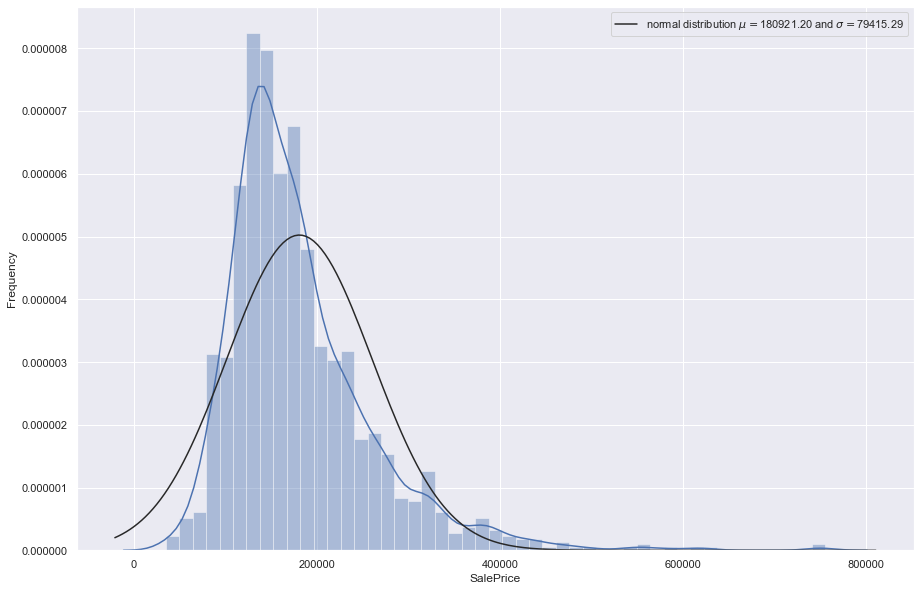

In [135]:
plt.subplots(figsize=(15,10))
sns.distplot(df['SalePrice'],fit=stats.norm)
plt.legend(['normal distribution $\mu = ${:.2f} and $\sigma = ${:.2f}'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')

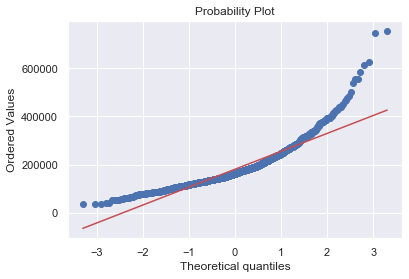

In [136]:
fig=plt.figure
stats.probplot(df['SalePrice'],plot=plt)
plt.show()

In [137]:
df['SalePrice'] = np.log1p(df['SalePrice'])

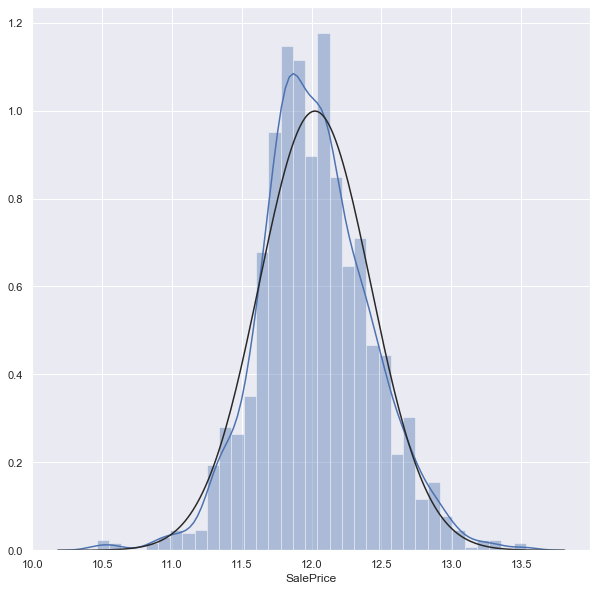

In [138]:
plt.subplots(figsize=(10,10))
sns.distplot(df['SalePrice'], fit=stats.norm)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.398259646654151, 12.024057394918403, 0.9953761551826701))

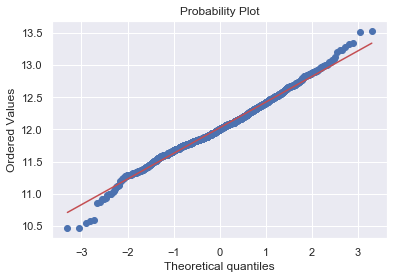

In [139]:
fig = plt.figure()
stats.probplot(df['SalePrice'], plot=plt)

## EDA & DATA PREPERATION:

#### Handling Missing values

In [140]:
df.columns[df.isnull().any()]
#checkimg the null values in the dataset

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [141]:
df.isnull().sum().sum()

6965

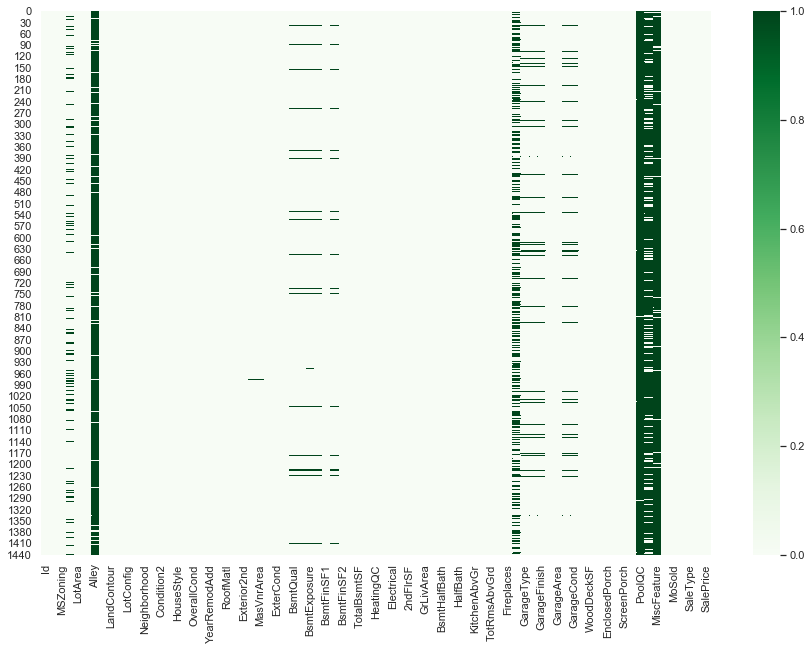

In [142]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(),cmap="Greens")

In [143]:
Null = df.isnull().sum()/len(df)*100
Null = Null[Null>0]
Null.sort_values(inplace=True, ascending=False)
Null #missing value counts in each column in percentage

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [144]:
#Convert into dataframe
Null = Null.to_frame()

In [145]:
Null.columns = ['count']

In [146]:
Null.index.names = ['Name']

In [147]:
Null['Name'] = Null.index

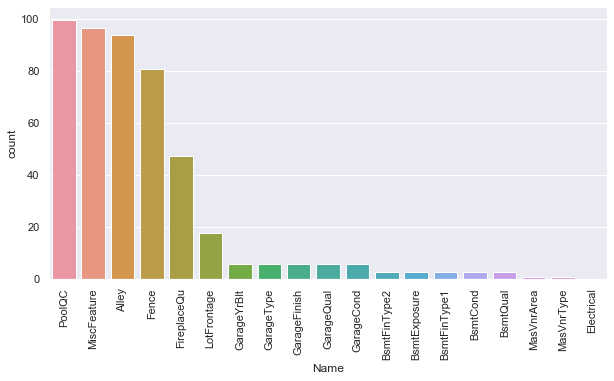

In [148]:
plt.figure(figsize=(10, 5))
sns.set()
sns.barplot(x='Name', y='count', data=Null)
plt.xticks(rotation = 90)
plt.show()
#plotting missing values

In [149]:
# Understanding the Correlation of other features with target variables
df_corr = df.select_dtypes(include=[np.number])

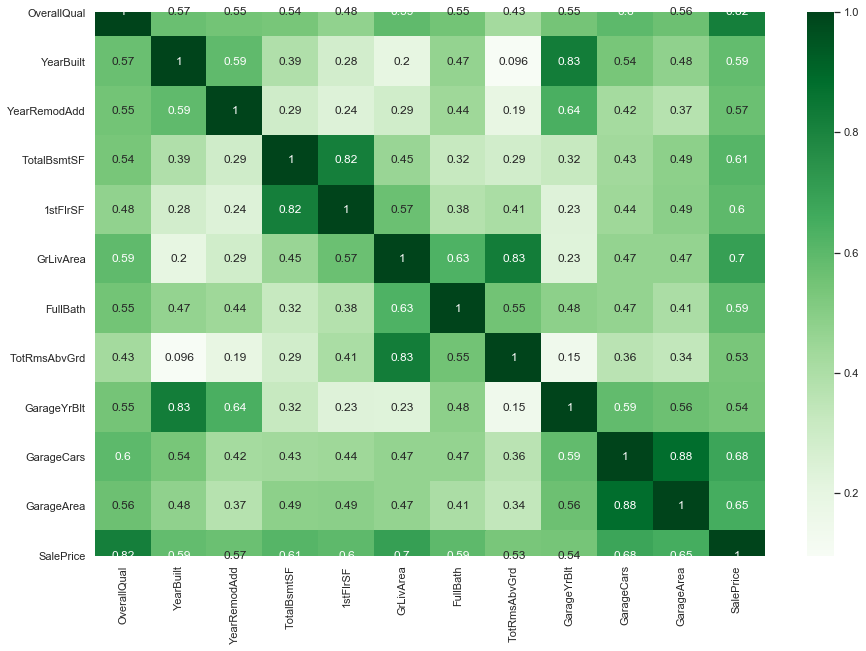

In [150]:
corr = df_corr.corr()
#as we see there are too many features ,therefore we will consider only those feautures whose corr > 0.5 or 50%
main_feautures = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(15, 10))
final_corr= df[main_feautures].corr()
sns.heatmap(final_corr, annot=True,cmap='Greens')
plt.show()

In [151]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [152]:
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

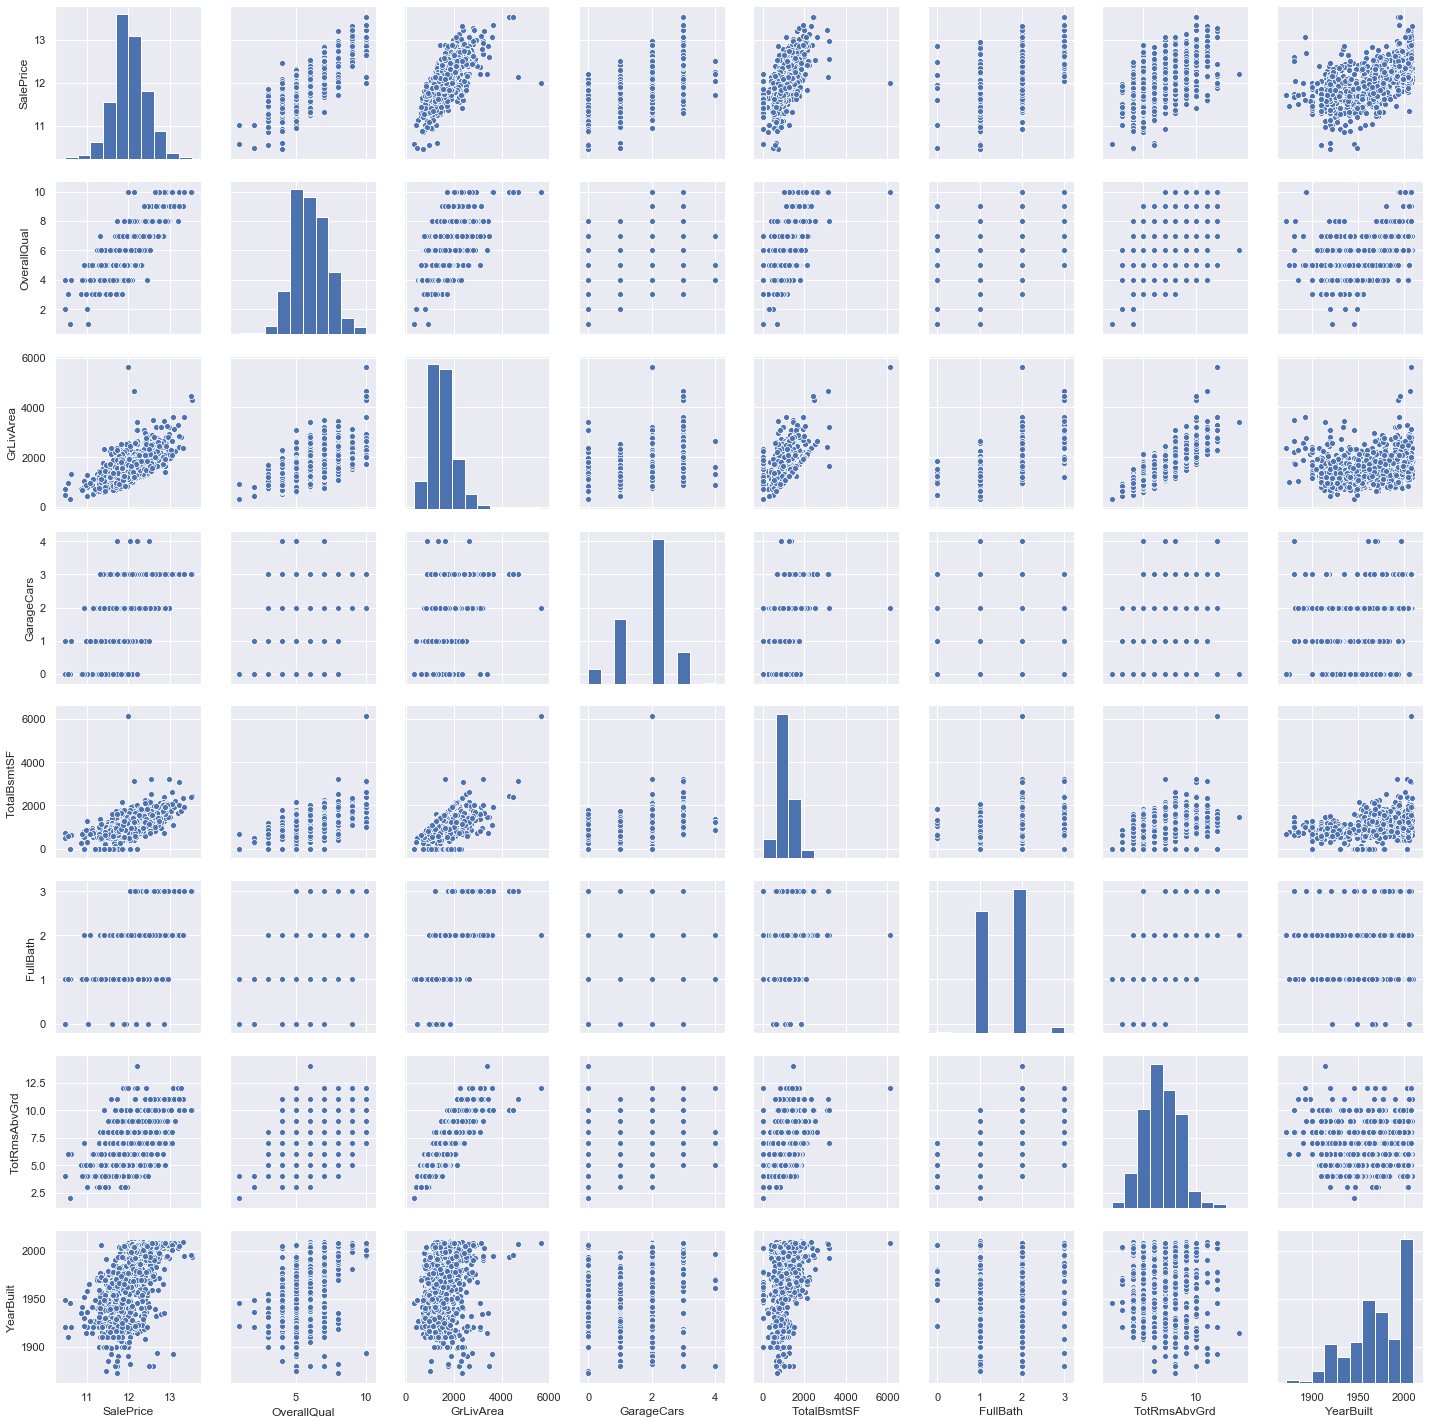

In [153]:
sns.set()
sns.pairplot(df[columns])
#comparing all those features that affects our SalePrice

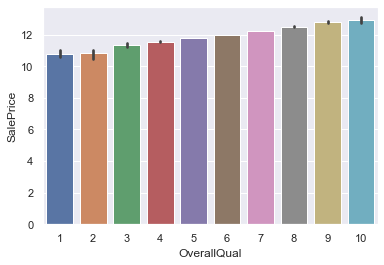

In [155]:
sns.barplot(df.OverallQual,df.SalePrice)

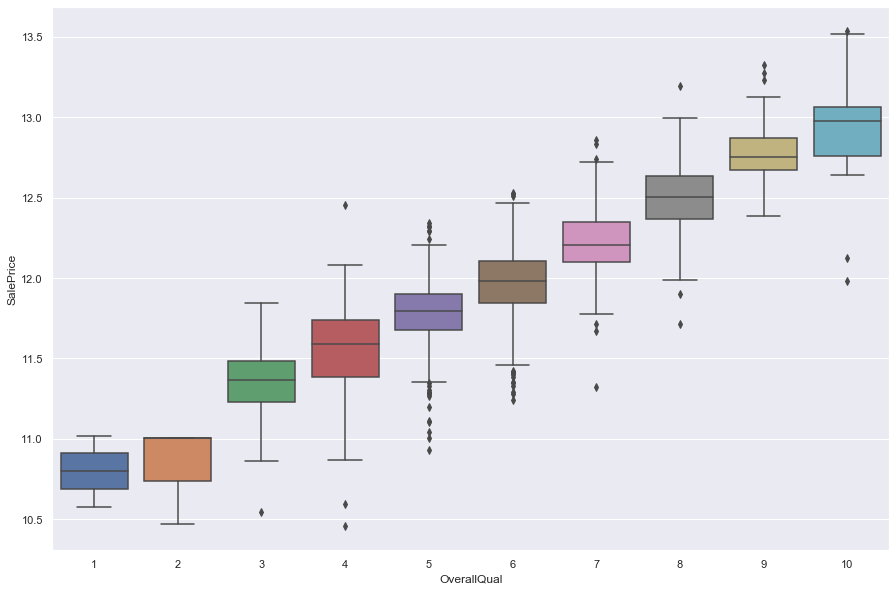

In [156]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df.OverallQual,y=df.SalePrice) #to check outliers

In [157]:
corr=df.corr()
corr.sort_values(['SalePrice'],ascending=True,inplace=True)
corr.SalePrice

EnclosedPorch   -0.149050
KitchenAbvGr    -0.147548
MSSubClass      -0.073959
LowQualFinSF    -0.037963
YrSold          -0.037263
OverallCond     -0.036868
MiscVal         -0.020021
Id              -0.017942
BsmtHalfBath    -0.005149
BsmtFinSF2       0.004832
3SsnPorch        0.054900
MoSold           0.057330
PoolArea         0.069798
ScreenPorch      0.121208
BedroomAbvGr     0.209043
BsmtUnfSF        0.221985
BsmtFullBath     0.236224
LotArea          0.257320
HalfBath         0.313982
2ndFlrSF         0.319300
OpenPorchSF      0.321053
WoodDeckSF       0.334135
LotFrontage      0.355879
BsmtFinSF1       0.372023
MasVnrArea       0.430809
Fireplaces       0.489450
TotRmsAbvGrd     0.534422
GarageYrBlt      0.541073
YearRemodAdd     0.565608
YearBuilt        0.586570
FullBath         0.594771
1stFlrSF         0.596981
TotalBsmtSF      0.612134
GarageArea       0.650888
GarageCars       0.680625
GrLivArea        0.700927
OverallQual      0.817185
SalePrice        1.000000
Name: SalePr

### So we see that features with missing values which have very less correlation with our target variable therefore we can either replace it with None.

In [158]:
df['PoolQC']=df['PoolQC'].fillna('None')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')
for i in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual','MasVnrType'):
    df[i] = df[i].fillna('None')

In [159]:
for i in ['GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea']:
    df[i] = df[i].fillna(int(0))
#replacing with 0

In [160]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical']).mode()[0]
#replacing with mode

In [161]:
df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#replacing with median

In [162]:
df = df.drop(['Utilities'], axis=1)
#we can drop this feature because this does not affects our SalePrice 

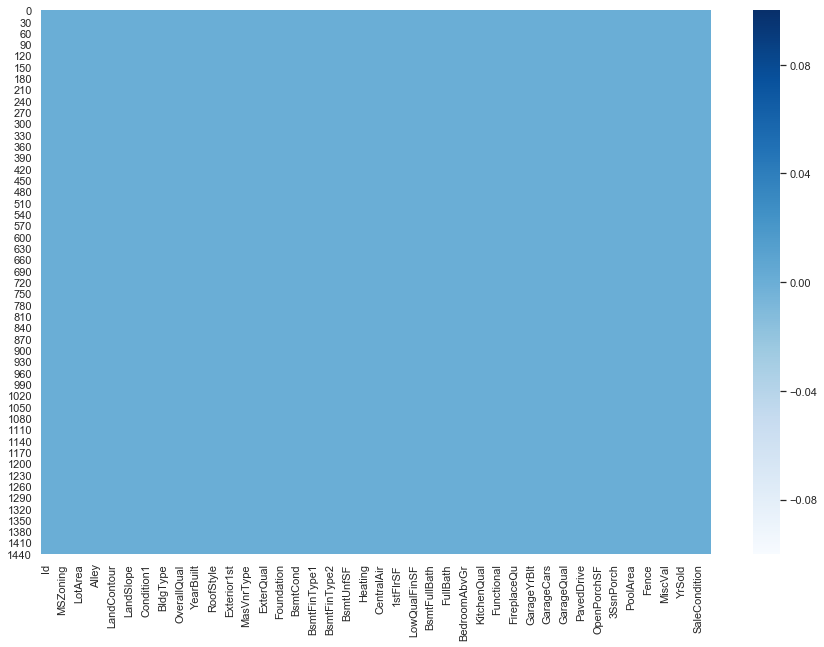

In [163]:
#Now checking again the null values
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(),cmap="Blues")

From this we see that all the null values are either filled or removed completely.

#### Label Encoding

In [164]:
col = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [165]:
from sklearn.preprocessing import LabelEncoder
for i in col:
    label = LabelEncoder() 
    label.fit(list(df[i].values)) 
    df[i] = label.transform(list(df[i].values))

In [225]:
df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,4.166438,3.028767,70.199658,10516.828082,0.995890,0.993836,1.942466,2.777397,3.019178,...,15.060959,2.758904,2.991096,3.504795,1.069178,43.489041,5.321918,1.815753,7.513014,3.770548
std,421.610009,4.161951,0.632017,22.431902,9981.264932,0.063996,0.249667,1.409156,0.707666,1.622634,...,55.757415,40.177307,0.140703,1.082912,0.372102,496.123024,2.703626,1.328095,1.552100,1.100854
min,1.000000,0.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,0.000000,3.000000,60.000000,7553.500000,1.000000,1.000000,0.000000,3.000000,2.000000,...,0.000000,0.000000,3.000000,4.000000,1.000000,0.000000,4.000000,1.000000,8.000000,4.000000
50%,730.500000,4.000000,3.000000,70.000000,9478.500000,1.000000,1.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,3.000000,4.000000,1.000000,0.000000,5.000000,2.000000,8.000000,4.000000
75%,1095.250000,6.000000,3.000000,80.000000,11601.500000,1.000000,1.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,3.000000,4.000000,1.000000,0.000000,7.000000,3.000000,8.000000,4.000000
max,1460.000000,14.000000,4.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,4.000000,...,480.000000,738.000000,3.000000,4.000000,4.000000,15500.000000,11.000000,4.000000,8.000000,5.000000


# RandomForest Regression

In [166]:
y = df['SalePrice']
del df['SalePrice']
X = df.values
y = y.values

In [219]:
# Training the model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [220]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [221]:
model.fit(X_train, y_train)
#fit the model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [222]:
#Score
print("Score of Random Forest Reg is: ", model.score(X_test, y_test))
#accuracy is 89.4%

Score of Random Forest Reg is:  0.8942561134869694


In [224]:
#Prediction
print("Predicted value " + str(model.predict([X_test[180]])))
print("Real value " + str(y_test[180]))

Predicted value [11.74941025]
Real value 11.736077016252437


# Linear Regression

In [171]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [172]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
#Score
print("Score of Linear Reg is: ", model.score(X_test, y_test))
#ACCURACY is 89.3%

Score of Linear Reg is:  0.8926708677161673


# Gradient Boosting Reg

In [174]:
from sklearn.ensemble import GradientBoostingRegressor
Gb = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [175]:
Gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [176]:
print("Score Gradient Boosting Reg is : ", Gb.score(X_test, y_test))

Score Gradient Boosting Reg is :  0.9179817232416447


#  Lasso Reg

Least  absolute  shrinkage  and  selection  operator  which is the short form name as Lasso. Lasso can be used in estimating the regression coefficient  and  performing  variable  selection. Lasso estimate minimizes the penalized sum of squares thus selecting only those features that are important.Therefore ,it helps in feature engineering.

In [192]:
import math 
import numpy as np
from sklearn.linear_model import Lasso

#Performing Lasso Regression
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("testing score: ", test_score)
print("number of features : ", coeff_used)

training score: 0.7622402429307419
testing score:  0.8016863607757152
number of features :  15


In [179]:
#Lasso Regression for apha = 0.01
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for \u03B1=0.01:", train_score001)
print("test score for \u03B1 =0.01: ", test_score001)
print("number of features used: for \u03B1 =0.01:", coeff_used001)

training score for α=0.01: 0.8575316934169622
test score for α =0.01:  0.8828506791490583
number of features used: for α =0.01: 41


In [213]:
#Lasso Regression for apha = 0.001
lasso0001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso0001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for \u03B1=0.001:", train_score00001) 
print("test score for \u03B1 =0.001: ", test_score00001)
print("number of features used: for \u03B1 =0.0001:", coeff_used00001)

training score for α=0.001: 0.8822771243307304
test score for α =0.001:  0.8936352904784931
number of features used: for α =0.0001: 78


In [210]:
from sklearn import metrics
y_train_pred = lasso0001.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8822771243307305


In [211]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8016863607757152


In [208]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.017983022828477774


#  Ridge Reg

This is also similar to Lasso but in ridge regression, the coefficients of correlated predictors are similar.Ridge works well if there are many large parameters of about the same value.

In [201]:
#Performing Ridge Regression
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr1500 = Ridge(alpha=1500) #  comparison with alpha value
rr1500.fit(X_train, y_train)

Ridge(alpha=1500, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [202]:
#Score for Ridge Regression for alphaa=0.01
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
print("Ridge Regression Score for \u03B1 =0.01 :{}\n".format(Ridge_test_score))

Ridge Regression Score for α =0.01 :0.8926841489035781



In [185]:
#Score for Ridge Regression for alphaa=1500
Ridge_train_score1500 = rr1500.score(X_train,y_train)
Ridge_test_score1500 = rr1500.score(X_test, y_test)
print("Ridge Regression Score for \u03B1 =1500 :{}\n".format(Ridge_test_score1500))

Ridge Regression Score for α =1500 :0.8693189330988311



In [214]:
y_train_pred = rr.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8823303048464654


In [215]:
y_test_pred = rr.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8926841489035781


In [212]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.033231611778995834


###  COMPARISON B/W LASSO AND RIDGE :

IN ORDER TO CHECK WHICH PERFOMS BETTER WE SHOULD DO CROSS VALIDATIONS AND AS WE CAN SEE THAT ROOT MEAN SQUARE ERROR OF LASSO IS LESS THAN RIDGE , THEREFORE WE SHOULD USE LASSO OVER RIDGE IN THIS CASE.